## Read in a whole recording

In [2]:
import os
import scipy.io
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import load_intan_rhd_format as intan
from AG_functions import *

In [3]:
pwd

'/home/annagd/Documents/Python'

In [4]:
cd ~/Documents/Python

/home/annagd/Documents/Python


Easiest way to count the files of a certain type in a folder is through linux commands not python. Also getting count of them before you loop through a process them is totally unnecessary, it's just informative. Like are we working with a 30min or a 60min recording? Or maybe neither and something's messed up.

Also note that putting python comments into a cell with linux shell commands doesn't work. You can just make a Markdown cell right above it though like this.

In [6]:
folder_path = '../../../../../media/ela2X/intanData/Stargazer/0056/rawData';
file_type = '.rhd';

In [7]:
ls $folder_path/*.rhd | wc -l

13


Hm there's 13 not 12 or 6 like would make sense for a 60 or 30 min recording. Maybe there's just a little spill over. Let's check the files' sizes.

In [8]:
ls $folder_path/*.rhd -l1 --block-size=G

-rwxrwxr--+ 1 ela LabFolks 5G Jan 25  2024 ../../../../../media/ela2X/intanData/Stargazer/0056/rawData/stg110_20240125_240125_123219.rhd*
-rwxrwxr--+ 1 ela LabFolks 5G Jan 25  2024 ../../../../../media/ela2X/intanData/Stargazer/0056/rawData/stg110_20240125_240125_123719.rhd*
-rwxrwxr--+ 1 ela LabFolks 5G Jan 25  2024 ../../../../../media/ela2X/intanData/Stargazer/0056/rawData/stg110_20240125_240125_124219.rhd*
-rwxrwxr--+ 1 ela LabFolks 5G Jan 25  2024 ../../../../../media/ela2X/intanData/Stargazer/0056/rawData/stg110_20240125_240125_124719.rhd*
-rwxrwxr--+ 1 ela LabFolks 5G Jan 25  2024 ../../../../../media/ela2X/intanData/Stargazer/0056/rawData/stg110_20240125_240125_125219.rhd*
-rwxrwxr--+ 1 ela LabFolks 5G Jan 25  2024 ../../../../../media/ela2X/intanData/Stargazer/0056/rawData/stg110_20240125_240125_125719.rhd*
-rwxrwxr--+ 1 ela LabFolks 5G Jan 25  2024 ../../../../../media/ela2X/intanData/Stargazer/0056/rawData/stg110_20240125_240125_130219.rhd*
-rwxrwxr--+ 1 ela LabFolks 5G Jan 

Yeah they all have 5 GB except for the last one so it must just be spillover of the hour.

## Now let's concatenate the downsampled data from every file to get the total data from one recording session

In [9]:
# Downsample & concatenate data from every file to get the total data from one recording session
# folder_path: path to the directory/folder where all the files you want to extract data from are
# file_type: the file extension of the data files. (like .rhd)
# alpha: the factor by which you want to downsample the data. 
    # For example, if you went from 30,000 Hz to 128 Hz, alpha = 234 
def loadRecording(folder_path, file_type, alpha):
    allData = [];
    counter = 1;
    current_time = 0
    for file_path in glob.glob(os.path.join(folder_path, f"*{file_type}")):
        print("\n\nFile", counter, ":" ,file_path)
        # read in data
        data = intan.read_data(file_path) 
        df = pd.DataFrame(data['amplifier_data'])
    
        # downsampling to make data more manageable
        dd_data = direct_downsample(df, alpha)
        
        # converting samples to seconds
        dd_data_df = pd.DataFrame(dd_data)
        
        if counter != 1: current_time = allData.index[-1] 
        samples_to_seconds(dd_data_df, dd_data_df.shape[0], 30000, current_time, alpha)
    
        # append the processed data to the overall storage array that will be returned
        # if it's the first file in the folder, initialize the processed data storage df, allData
        if counter == 0: 
            allData = np.empty((0, dd_data_df.shape[1]))
        allData = pd.concat([pd.DataFrame(allData), dd_data_df])
    
        counter = counter + 1

    return allData

In [74]:
alpha = 234;

allData = loadRecording(folder_path, file_type, alpha)



File 1 : ../../../../../media/ela2X/intanData/Stargazer/0056/rawData/stg110_20240125_240125_125219.rhd

Reading Intan Technologies RHD Data File, Version 3.0

Found 256 amplifier channels.
Found 12 auxiliary input channels.
Found 0 supply voltage channels.
Found 2 board ADC channels.
Found 2 board digital input channels.
Found 0 board digital output channels.
Found 0 temperature sensors channels.

File contains 300.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 32.1 seconds
Total Time (sec): 300.0036
Sample Interval: 0.0078000000000000005


File 2 : ../../../../../media/ela2X/intanData/Stargazer/0056/rawData/stg110_20240125_240125_131719.rhd

Reading Intan Technologies RHD Data File, Version 3.0

Found 256 amplifier channels.
Found 12 auxili

In [13]:
allData

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0.0000,-264.225,-240.435,-234.000,-190.710,-225.420,-201.630,-195.000,-197.730,-178.815,-144.690,...,-130.260,-130.845,-173.355,-182.715,-157.755,-165.555,-172.185,-163.800,-185.445,-217.815
0.0078,-411.255,-288.990,-271.635,-229.515,-246.090,-223.860,-247.260,-266.565,-222.495,-221.520,...,-212.745,-205.920,-208.650,-216.645,-193.440,-188.370,-206.895,-197.340,-232.245,-315.120
0.0156,-213.915,-171.795,-140.985,-130.650,-171.210,-177.450,-153.075,-165.360,-137.475,-131.235,...,-146.835,-139.035,-166.920,-166.140,-137.085,-125.580,-139.035,-159.705,-185.640,-210.990
0.0234,-103.155,-128.895,-129.090,-95.745,-123.825,-136.695,-127.335,-144.885,-126.165,-103.350,...,-129.285,-137.475,-121.290,-113.295,-95.160,-84.435,-74.880,-103.350,-110.760,-111.735
0.0312,-127.920,-130.260,-158.145,-134.940,-101.400,-93.990,-106.275,-106.860,-118.170,-97.110,...,-118.950,-123.630,-100.425,-97.500,-77.610,-52.065,-60.840,-72.345,-70.980,-56.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601.8996,-172.770,-129.090,-135.720,-106.080,-80.535,-72.540,-91.455,-73.320,-85.800,-129.090,...,-101.010,-83.070,-38.610,-43.875,-19.305,1.560,-44.070,-16.575,-47.580,-140.010
3601.9074,-21.255,-43.095,-50.115,-32.565,-6.825,-5.460,-25.155,-3.705,-16.575,-55.575,...,-36.465,-36.270,-12.675,-8.775,1.365,25.935,-2.535,-6.825,-16.185,-59.085
3601.9152,-47.775,-89.895,-119.925,-113.295,-57.135,-50.310,-93.990,-63.180,-56.355,-65.130,...,-75.660,-80.535,-61.815,-59.085,-46.800,-1.755,-46.995,-47.385,-52.065,-74.295
3601.9230,-46.410,-77.610,-65.715,-82.485,-50.505,-67.665,-58.110,-58.695,-67.080,-6.045,...,-13.650,-50.115,-46.215,-66.495,-61.230,-42.510,-69.030,-67.275,-66.300,-56.940


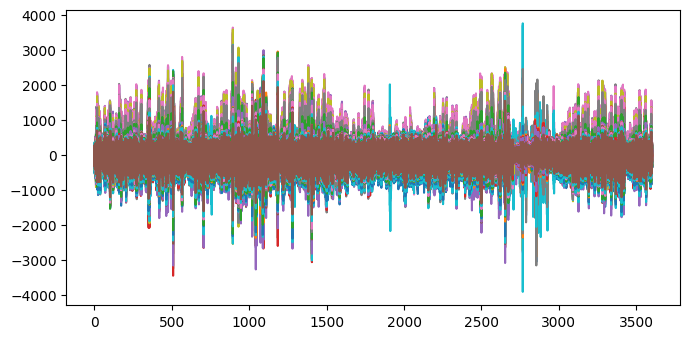

In [66]:
# total recording y = seconds, x = voltage
plt.plot(allData);

# Label Records as non-ictal, pre-ictal and ictal

### Load Seizure Start and End Times

In [87]:
# for testing the function later
allData_copy = allData.copy()

In [75]:
starts = scipy.io.loadmat("seizureStartTimes.mat")
ends = scipy.io.loadmat("seizureEndTimes.mat")

In [15]:
starts

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  1 16:18:30 2024',
 '__version__': '1.0',
 '__globals__': [],
 'seizureStartTimes': array([[  29.312],
        [  58.636],
        [  82.179],
        [  91.418],
        [ 185.798],
        [ 202.362],
        [ 226.833],
        [ 275.457],
        [ 327.001],
        [ 387.389],
        [ 393.71 ],
        [ 417.624],
        [ 462.292],
        [ 467.701],
        [ 476.981],
        [ 485.372],
        [ 491.903],
        [ 509.621],
        [ 521.854],
        [ 534.378],
        [ 640.571],
        [ 658.18 ],
        [ 685.532],
        [ 749.685],
        [ 773.098],
        [ 799.103],
        [ 868.117],
        [ 876.904],
        [ 896.963],
        [1274.705],
        [1371.801],
        [1383.312],
        [1392.15 ],
        [1431.643],
        [1467.797],
        [1588.7  ],
        [1594.312],
        [1820.583],
        [1887.422],
        [1912.111],
        [1923.892],
        [1934.197],


In [76]:
starts = starts['seizureStartTimes']
np.shape(starts)

(73, 1)

In [17]:
ends

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  1 16:18:30 2024',
 '__version__': '1.0',
 '__globals__': [],
 'seizureEndTimes': array([[  31.795,   60.774,   85.123,   95.111,  188.946,  206.851,
          230.297,  277.644,  334.23 ,  390.644,  396.014,  420.295,
          464.814,  469.942,  479.79 ,  487.792,  499.69 ,  514.001,
          522.909,  552.897,  645.244,  664.812,  687.463,  751.812,
          776.76 ,  802.574,  871.47 ,  880.087,  899.184, 1276.091,
         1374.971, 1385.531, 1396.334, 1435.645, 1474.855, 1593.098,
         1598.695, 1823.364, 1890.959, 1914.504, 1926.259, 1935.665,
         1970.19 , 2033.807, 2088.213, 2098.078, 2119.88 , 2130.791,
         2176.219, 2198.217, 2209.396, 2218.268, 2266.507, 2282.14 ,
         2293.997, 2298.178, 2306.56 , 2315.849, 2323.551, 2447.014,
         2481.174, 2505.442, 2543.102, 2549.186, 2688.923, 2708.321,
         2809.003, 3403.726, 3430.138, 3461.556, 3493.354, 3536.551,
         3591.

In [77]:
ends = ends['seizureEndTimes']
np.shape(ends)

(1, 73)

In [78]:
ends = ends.reshape(-1,1)
np.shape(ends)

(73, 1)

In [32]:
ends[0][0]

np.float64(31.795)

In [45]:
# testing it out
for i in range(np.shape(ends)[0]):
    print("\nPre-ictal & Ictal regions",i,":")
    pre_ictal = allData[(allData.index >= (starts[i][0]-5)) & (allData.index < starts[i][0])]
    print(pre_ictal.iloc[[0,-1],0:5])
    ictal = allData[(allData.index >= starts[i][0]) & (allData.index < ends[i][0])]
    print(ictal.iloc[[0,-1], 0:5])


Pre-ictal & Ictal regions 0 :
               0        1        2       3       4
24.3126  154.245   79.170   43.095   22.23   46.80
29.3046  269.295  179.205  159.705  138.84  125.19
              0        1       2      3       4
29.3124  163.80  103.740  64.740  46.02  52.065
31.7928  141.57   -6.825 -71.955 -76.83 -49.920

Pre-ictal & Ictal regions 1 :
               0       1       2        3       4
53.6406  216.060  164.58  157.95  146.055  180.57
58.6326  -58.305  -53.43  -42.51  -29.445  -61.23
              0       1      2      3       4
58.6404 -62.985 -32.175 -72.54 -33.15 -26.325
60.7698 -14.430 -44.655 -54.99 -91.65 -83.265

Pre-ictal & Ictal regions 2 :
             0      1       2       3       4
77.181 -85.605 -80.34 -56.745 -59.280 -96.915
82.173  78.195  -3.12  13.845 -14.235 -33.735
             0      1       2       3       4
82.1808  66.69  -3.51  -6.825 -25.155 -14.625
85.1214  40.56  72.93  72.150  65.715  39.390

Pre-ictal & Ictal regions 3 :
              0

# Choose the class definitions

0. Non-seizure
1. Pre-seizure
2. Seizure

In [50]:
# the test output looks good so now we'll create a new column in the dataset to store the class
# the default class will be 0
allData["class"] = np.zeros(allData.shape[0], int)
allData["class"]

0.0000       0
0.0078       0
0.0156       0
0.0234       0
0.0312       0
            ..
3601.8996    0
3601.9074    0
3601.9152    0
3601.9230    0
3601.9308    0
Name: class, Length: 461799, dtype: int64

In [55]:
allData.loc[allData.index < ends[1][0], "class"]

0.0000     0
0.0078     0
0.0156     0
0.0234     0
0.0312     0
          ..
60.7386    0
60.7464    0
60.7542    0
60.7620    0
60.7698    0
Name: class, Length: 7792, dtype: int64

In [67]:
for i in range(np.shape(ends)[0]):
    allData.loc[(allData.index >= (starts[i][0]-5)) & (allData.index < starts[i][0]),"class"] = 1
    allData.loc[(allData.index >= starts[i][0]) & (allData.index < ends[i][0]), "class"] = 2

In [70]:
# class 1, pre-ictal
allData.loc[(allData.index >= (starts[i][0]-5)) & (allData.index < starts[i][0]),"class"].head()

3577.3686    1
3577.3764    1
3577.3842    1
3577.3920    1
3577.3998    1
Name: class, dtype: int64

In [71]:
# class 2, ictal
allData.loc[(allData.index >= starts[i][0]) & (allData.index < ends[i][0]), "class"].head()

3582.3684    2
3582.3762    2
3582.3840    2
3582.3918    2
3582.3996    2
Name: class, dtype: int64

In [72]:
# class 0, non-ictal, everything else. Quick check by just checking the first and last values of the column
allData["class"]

0.0000       0
0.0078       0
0.0156       0
0.0234       0
0.0312       0
            ..
3601.8996    0
3601.9074    0
3601.9152    0
3601.9230    0
3601.9308    0
Name: class, Length: 461799, dtype: int64

In [88]:
# labels every record/row in the data as non-seizure (class=0), pre-seizure(class=1), or seizure(class=2)
# allData: all the data you want labeled. The index of the dataframe must be the timestamps (seconds)
# stars: an array of all the timestamps that seizures started (seconds)
# ends: an array of all the timestamps that seizurses stopped (the timestamp of the final SWD trough) (in seconds)
def label_data(allData, starts, ends, sec_pre_ictal):
    allData["class"] = np.zeros(allData.shape[0], int)
    for i in range(np.shape(ends)[0]):
        allData.loc[(allData.index >= (starts[i][0]-sec_pre_ictal)) & (allData.index < starts[i][0]),"class"] = 1
        allData.loc[(allData.index >= starts[i][0]) & (allData.index < ends[i][0]), "class"] = 2

In [89]:
label_data(allData_copy, starts, ends, 5)

In [91]:
# class 1, pre-ictal
allData_copy.loc[(allData_copy.index >= (starts[i][0]-5)) & (allData_copy.index < starts[i][0]),"class"].head()

3577.3686    1
3577.3764    1
3577.3842    1
3577.3920    1
3577.3998    1
Name: class, dtype: int64